In [3]:
%matplotlib inline

In [4]:
import json
import math
import os

import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from PIL import Image

In [7]:
# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/processed/train/normal/"
json_path = "./label_file/train_normal_refined.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())

In [8]:
json_data['_via_img_metadata']

{'0000.png196595': {'filename': '0000.png',
  'size': 196595,
  'regions': [],
  'file_attributes': {}},
 '0001.png252152': {'filename': '0001.png',
  'size': 252152,
  'regions': [{'shape_attributes': {'name': 'ellipse',
     'cx': 501,
     'cy': 265,
     'rx': 216.058,
     'ry': 156,
     'theta': 3.118},
    'region_attributes': {'type': '1'}},
   {'shape_attributes': {'name': 'ellipse',
     'cx': 589,
     'cy': 245,
     'rx': 117.277,
     'ry': 74,
     'theta': 2.944},
    'region_attributes': {'type': '2'}}],
  'file_attributes': {}},
 '0002.png193649': {'filename': '0002.png',
  'size': 193649,
  'regions': [{'shape_attributes': {'name': 'ellipse',
     'cx': 347,
     'cy': 370,
     'rx': 297.594,
     'ry': 212,
     'theta': 0.241},
    'region_attributes': {'type': '1'}},
   {'shape_attributes': {'name': 'ellipse',
     'cx': 249,
     'cy': 393,
     'rx': 152.122,
     'ry': 93,
     'theta': -0.307},
    'region_attributes': {'type': '2'}}],
  'file_attributes': {

In [14]:
for key in json_data['_via_img_metadata'].keys():
    file_name = json_data['_via_img_metadata'][key]['filename']
    regions = json_data['_via_img_metadata'][key]['regions']
    if regions:
        break

In [15]:
region = regions[0]
ellipse = region['shape_attributes']
label = int(region['region_attributes']['type'])
regions

[{'shape_attributes': {'name': 'ellipse',
   'cx': 501,
   'cy': 265,
   'rx': 216.058,
   'ry': 156,
   'theta': 3.118},
  'region_attributes': {'type': '1'}},
 {'shape_attributes': {'name': 'ellipse',
   'cx': 589,
   'cy': 245,
   'rx': 117.277,
   'ry': 74,
   'theta': 2.944},
  'region_attributes': {'type': '2'}}]

In [16]:
region, ellipse, label

({'shape_attributes': {'name': 'ellipse',
   'cx': 501,
   'cy': 265,
   'rx': 216.058,
   'ry': 156,
   'theta': 3.118},
  'region_attributes': {'type': '1'}},
 {'name': 'ellipse',
  'cx': 501,
  'cy': 265,
  'rx': 216.058,
  'ry': 156,
  'theta': 3.118},
 1)

In [42]:
ellipse

{'name': 'ellipse',
 'cx': 410,
 'cy': 262,
 'rx': 257.437,
 'ry': 190,
 'theta': -0.336}

In [35]:
region['theta']/math.pi*360

-38.502763832791324

In [17]:
if region['shape_attributes']['name']=='ellipse':
    ellipse = region['shape_attributes']
    cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360

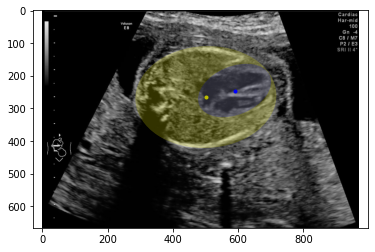

In [18]:
# load and show image
file_path = os.path.join(data_folder, file_name)
image = plt.imread(file_path)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image, cmap='gray')

# display label
for region in regions:
    label = int(region['region_attributes']['type'])
    
    if region['shape_attributes']['name']=='ellipse':
        ellipse = region['shape_attributes']
        cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 180
    else:
        continue
    
    if label == 1:
        color = 'yellow'
        dot = 'y.'
    elif label == 2:
        color = 'blue'
        dot = 'b.'
        
    ell = Ellipse(xy = (cx, cy), width = 2 * rx, height = 2 * ry, angle = angle, facecolor= color, alpha=0.2)
    ax.add_patch(ell)
    ax.plot(cx, cy, dot)
    
plt.axis('scaled')
plt.axis('equal')   #changes limits of x or y axis so that equal increments of x and y have the same length

plt.show()
# plt.imshow(image, cmap='gray')

# Normal File

In [58]:
# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/processed/train/normal/"
save_folder = "/data/cc/Data/CHD/processed/train/normal_seg/"
if not os.path.exists(save_path):
    os.makedirs(save_path)
json_path = "train_normal_28Dec2020_10h54m.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())

# Display label file

In [6]:
idx = 0

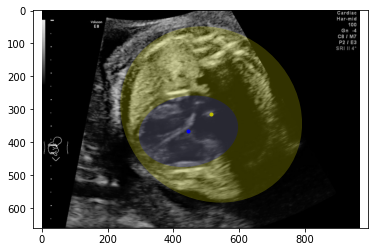

In [7]:
key = list(json_data['_via_img_metadata'].keys())[idx]
# for key in json_data['_via_img_metadata'].keys():
file_name = json_data['_via_img_metadata'][key]['filename']
regions = json_data['_via_img_metadata'][key]['regions']
    
idx += 1
    
# load and show image
file_path = os.path.join(data_folder, file_name)
image = plt.imread(file_path)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image, cmap='gray')

# display label
for region in regions:
    label = int(region['region_attributes']['type'])
    
    if region['shape_attributes']['name']=='ellipse':
        ellipse = region['shape_attributes']
        cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360
    else:
        print("{} label error!".format(file_name))
        continue
    
    if label == 1:
        color = 'yellow'
        dot = 'y.'
    elif label == 2:
        color = 'blue'
        dot = 'b.'
        
    ell = Ellipse(xy = (cx, cy), width = 2 * rx, height = 2 * ry, angle = angle, facecolor= color, alpha=0.2)
    ax.add_patch(ell)
    ax.plot(cx, cy, dot)
    
plt.axis('scaled')
plt.axis('equal')   #changes limits of x or y axis so that equal increments of x and y have the same length

plt.show()
# plt.imshow(image, cmap='gray')

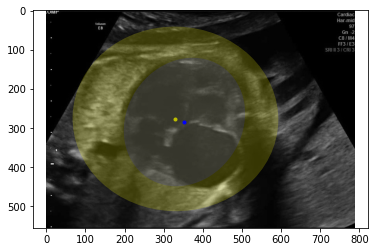

In [134]:
# Display Label
# load and show image
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image, cmap='gray')

# display label
for region in regions:
    label = int(region['region_attributes']['type'])
    
    if region['shape_attributes']['name']=='ellipse':
        ellipse = region['shape_attributes']
        cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360
    else:
        print("{} label error!".format(file_name))
        continue
    
    if label == 1:
        color = 'yellow'
        dot = 'y.'
    elif label == 2:
        color = 'blue'
        dot = 'b.'
        
    ell = Ellipse(xy = (cx, cy), width = 2 * rx, height = 2 * ry, angle = angle, facecolor= color, alpha=0.2)
    ax.add_patch(ell)
    ax.plot(cx, cy, dot)
    
plt.axis('scaled')
plt.axis('equal')   #changes limits of x or y axis so that equal increments of x and y have the same length

plt.show()
# plt.imshow(image, cmap='gray')

In [108]:
len(regions)

2

# Process Normal Annotations

In [110]:
for idx in range(len(json_data['_via_img_metadata'].keys())):

    key = list(json_data['_via_img_metadata'].keys())[idx]
    file_name = json_data['_via_img_metadata'][key]['filename']
    regions = json_data['_via_img_metadata'][key]['regions']
    print("Processing {}".format(file_name))

    # load and make labels
    file_path = os.path.join(data_folder, file_name)
    image = plt.imread(file_path)
    file_idx = file_path.split('/')[-1].split('.')[0]

    image = plt.imread(file_path)
    label_map = np.zeros_like(image, dtype=np.uint8)
    label_map_lung = np.zeros_like(image, dtype=np.uint8)
    label_map_heart = np.zeros_like(image, dtype=np.uint8)

    if len(regions) != 2:
        continue
        
    for region in regions:
        label = int(region['region_attributes']['type'])

        if region['shape_attributes']['name']=='ellipse':
            ellipse = region['shape_attributes']
            cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360
        else:
            print("{} label error!".format(file_name))
            continue

        if label == 1:
            label_map_lung = cv2.ellipse(label_map_lung, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (1, 1, 1), thickness=-1)
            label_map = cv2.ellipse(label_map, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (1, 1, 1), thickness=-1)
    #         plt.imsave(os.path.join(save_folder, "{}_lung.png".format(file_idx)), label_map_lung, cmap='gray')
            label_map_lung = Image.fromarray(label_map_lung)
            label_map_lung.save(os.path.join(save_folder, "{}_lung.png".format(file_idx)))
        elif label == 2:
            label_map_heart = cv2.ellipse(label_map_heart, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (1, 1, 1), thickness=-1)
            label_map = cv2.ellipse(label_map, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (2, 2, 2), thickness=-1)
    #         plt.imsave(os.path.join(save_folder, "{}_heart.png".format(file_idx)), label_map_heart, cmap='gray')
            label_map_heart = Image.fromarray(label_map_heart)
            label_map_heart.save(os.path.join(save_folder, "{}_heart.png".format(file_idx)))

    plt.imsave(os.path.join(save_folder, "{}_seg_vis.png".format(file_idx)), label_map)
    label_map = Image.fromarray(label_map)
    label_map.save(os.path.join(save_folder, "{}_seg.png".format(file_idx)))
    
#     break

Processing 0000.png
Processing 0001.png
Processing 0002.png
Processing 0003.png
Processing 0004.png
Processing 0005.png
Processing 0006.png
Processing 0007.png
Processing 0008.png
Processing 0009.png
Processing 0010.png
Processing 0011.png
Processing 0012.png
Processing 0013.png
Processing 0014.png
Processing 0015.png
Processing 0016.png
Processing 0017.png
Processing 0018.png
Processing 0019.png
Processing 0020.png
Processing 0021.png
Processing 0022.png
Processing 0023.png
Processing 0024.png
Processing 0025.png
Processing 0026.png
Processing 0027.png
Processing 0028.png
Processing 0029.png
Processing 0030.png
Processing 0031.png
Processing 0032.png
Processing 0033.png
Processing 0034.png
Processing 0035.png
Processing 0036.png
Processing 0037.png
Processing 0038.png
Processing 0039.png
Processing 0040.png
Processing 0041.png
Processing 0042.png
Processing 0043.png
Processing 0044.png
Processing 0045.png
Processing 0046.png
Processing 0047.png
Processing 0048.png
Processing 0049.png


Processing 0419.png
Processing 0420.png
Processing 0421.png
Processing 0422.png
Processing 0423.png
Processing 0424.png
Processing 0425.png
Processing 0426.png
Processing 0427.png
Processing 0428.png
Processing 0429.png
Processing 0430.png
Processing 0431.png
Processing 0432.png
Processing 0433.png
Processing 0434.png
Processing 0435.png
Processing 0436.png
Processing 0437.png
Processing 0438.png
Processing 0439.png
Processing 0440.png
Processing 0441.png
Processing 0442.png
Processing 0443.png
Processing 0444.png
Processing 0445.png
Processing 0446.png
Processing 0447.png
Processing 0448.png
Processing 0449.png
Processing 0450.png
Processing 0451.png
Processing 0452.png
Processing 0453.png
Processing 0454.png
Processing 0455.png
Processing 0456.png
Processing 0457.png
Processing 0458.png
Processing 0459.png
Processing 0460.png
Processing 0461.png
Processing 0462.png
Processing 0463.png
Processing 0464.png
Processing 0465.png
Processing 0466.png
Processing 0467.png
Processing 0468.png


Processing 0837.png
Processing 0838.png
Processing 0839.png
Processing 0840.png
Processing 0841.png
Processing 0842.png
Processing 0843.png
Processing 0844.png
Processing 0845.png
Processing 0846.png
Processing 0847.png
Processing 0848.png
Processing 0849.png
Processing 0850.png
Processing 0851.png
Processing 0852.png
Processing 0853.png
Processing 0854.png
Processing 0855.png
Processing 0856.png
Processing 0857.png
Processing 0858.png
Processing 0859.png
Processing 0860.png
Processing 0861.png
Processing 0862.png
Processing 0863.png
Processing 0864.png
Processing 0865.png
Processing 0866.png
Processing 0867.png
Processing 0868.png
Processing 0869.png
Processing 0870.png
Processing 0871.png
Processing 0872.png
Processing 0873.png
Processing 0874.png
Processing 0875.png
Processing 0876.png
Processing 0877.png
Processing 0878.png
Processing 0879.png
Processing 0880.png
Processing 0881.png
Processing 0882.png
Processing 0883.png
Processing 0884.png
Processing 0885.png
Processing 0886.png


# Process Abnormal Annotations

In [135]:
# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/processed/train/abnormal/"
save_folder = "/data/cc/Data/CHD/processed/train/abnormal_seg/"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
json_path = "train_abnormal_24Dec2020_15h32m.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())

In [136]:
for idx in range(len(json_data['_via_img_metadata'].keys())):

    key = list(json_data['_via_img_metadata'].keys())[idx]
    file_name = json_data['_via_img_metadata'][key]['filename']
    regions = json_data['_via_img_metadata'][key]['regions']
    if len(regions) != 2:
        continue
    print("Processing {}".format(file_name))

    # load and make labels
    file_path = os.path.join(data_folder, file_name)
    image = plt.imread(file_path)
    file_idx = file_path.split('/')[-1].split('.')[0]

    label_map = np.zeros_like(image, dtype=np.uint8)
    label_map_lung = np.zeros_like(image, dtype=np.uint8)
    label_map_heart = np.zeros_like(image, dtype=np.uint8)

    for region in regions:
        label = int(region['region_attributes']['type'])

        if region['shape_attributes']['name']=='ellipse':
            ellipse = region['shape_attributes']
            cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360
        else:
            print("{} label error!".format(file_name))
            continue

        if label == 1:
            label_map_lung = cv2.ellipse(label_map_lung, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (1, 1, 1), thickness=-1)
            label_map = cv2.ellipse(label_map, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (1, 1, 1), thickness=-1)
    #         plt.imsave(os.path.join(save_folder, "{}_lung.png".format(file_idx)), label_map_lung, cmap='gray')
            label_map_lung = Image.fromarray(label_map_lung)
            label_map_lung.save(os.path.join(save_folder, "{}_lung.png".format(file_idx)))
        elif label == 2:
            label_map_heart = cv2.ellipse(label_map_heart, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (1, 1, 1), thickness=-1)
            label_map = cv2.ellipse(label_map, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (2, 2, 2), thickness=-1)
    #         plt.imsave(os.path.join(save_folder, "{}_heart.png".format(file_idx)), label_map_heart, cmap='gray')
            label_map_heart = Image.fromarray(label_map_heart)
            label_map_heart.save(os.path.join(save_folder, "{}_heart.png".format(file_idx)))

    plt.imsave(os.path.join(save_folder, "{}_seg_vis.png".format(file_idx)), label_map)
    label_map = Image.fromarray(label_map)
    label_map.save(os.path.join(save_folder, "{}_seg.png".format(file_idx)))
    
#     break

Processing 0001.png


(556, 789) [0 1]


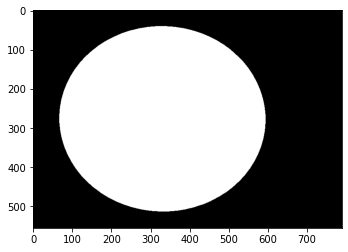

In [131]:
file_name = '0001'
read_label = np.array(Image.open(os.path.join(save_folder, "{}_seg.png".format(file_name))))
print(read_label.shape, np.unique(read_label))
plt.imshow(read_label, cmap='gray')

(661, 966) [0.         0.00392157 0.00784314]


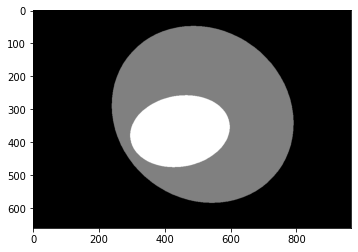

In [92]:
read_label = plt.imread(os.path.join(save_folder, "{}_seg.png".format(file_name)))
print(read_label.shape, np.unique(read_label))
plt.imshow(read_label, cmap='gray')

In [44]:
# Functions to get ellipse's envelope
def get_ellipse_param(major_radius, minor_radius, angle):
    a, b = major_radius, minor_radius
    sin_theta = np.sin(-angle)
    cos_theta = np.cos(-angle)
    A = a**2 * sin_theta**2 + b**2 * cos_theta**2
    B = 2 * (a**2 - b**2) * sin_theta * cos_theta
    C = a**2 * cos_theta**2 + b**2 * sin_theta**2
    F = -a**2 * b**2
    return A, B, C, F

def calculate_rectangle(A, B, C, F):
    # y coordinates of upper and lower boundaries
    y = np.sqrt(4*A*F / (B**2 - 4*A*C))
    y1, y2 = -np.abs(y), np.abs(y)
    
    # x coordinates of left and right boundaries
    x = np.sqrt(4*C*F / (B**2 - 4*C*A))
    x1, x2 = -np.abs(x), np.abs(x)
    
    return (x1, y1), (x2, y2)

def get_envelop(center_x, center_y, major_radius, minor_radius, angle):
    # Return the cordinates of upper left and bottom right corners
    A, B, C, F = get_ellipse_param(major_radius, minor_radius, angle)
    p1, p2 = calculate_rectangle(A, B, C, F)
    return (int(center_x+p1[0]), int(center_y+p1[1])), (int(center_x+p2[0]), int(center_y+p2[1])) 

In [190]:
pt1, pt2

((195, 122), (510, 447))

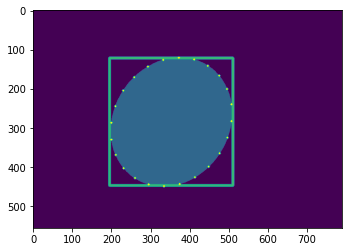

In [162]:
l = np.zeros_like(image)
l = cv2.ellipse(l, (cx, cy), (int(rx), int(ry)), angle, 0.0, 360.0, (1, 1, 1), thickness=-1)
pt1, pt2 = get_envelop(cx, cy, rx, ry, angle)
l = cv2.rectangle(l, pt1, pt2, (2, 2, 2), 5)
points = cv2.ellipse2Poly((cx, cy), (int(rx), int(ry)), int(angle), 0, 360, 15)
for pt in points:
    l = cv2.circle(l, tuple(pt), 1, (3, 3, 3), 3)
plt.imshow(l)

In [167]:
points = cv2.ellipse2Poly((cx, cy), (int(rx), int(ry)), int(angle), 0, 359, 15)
len(points), points

(25,
 array([[260, 428],
        [231, 403],
        [211, 369],
        [200, 330],
        [200, 287],
        [210, 245],
        [230, 205],
        [258, 171],
        [293, 144],
        [332, 127],
        [372, 121],
        [411, 126],
        [446, 142],
        [475, 167],
        [495, 201],
        [506, 240],
        [506, 283],
        [496, 325],
        [476, 365],
        [448, 399],
        [413, 426],
        [374, 443],
        [334, 449],
        [295, 444],
        [262, 430]], dtype=int32))

In [145]:
pt1, pt2 = get_envelop(cx, cy, rx, ry, angle)
pt1, pt2

((195, 122), (510, 447))

# Prepare COCO format json

In [60]:
# Functions to get ellipse's envelope
def get_ellipse_param(major_radius, minor_radius, angle):
    a, b = major_radius, minor_radius
    sin_theta = np.sin(-angle)
    cos_theta = np.cos(-angle)
    A = a**2 * sin_theta**2 + b**2 * cos_theta**2
    B = 2 * (a**2 - b**2) * sin_theta * cos_theta
    C = a**2 * cos_theta**2 + b**2 * sin_theta**2
    F = -a**2 * b**2
    return A, B, C, F

def calculate_rectangle(A, B, C, F):
    # y coordinates of upper and lower boundaries
    y = np.sqrt(4*A*F / (B**2 - 4*A*C))
    y1, y2 = -np.abs(y), np.abs(y)
    
    # x coordinates of left and right boundaries
    x = np.sqrt(4*C*F / (B**2 - 4*C*A))
    x1, x2 = -np.abs(x), np.abs(x)
    
    return (x1, y1), (x2, y2)

def get_envelop(center_x, center_y, major_radius, minor_radius, angle):
    # Return the cordinates of upper left and bottom right corners
    A, B, C, F = get_ellipse_param(major_radius, minor_radius, angle)
    p1, p2 = calculate_rectangle(A, B, C, F)
    return (int(center_x+p1[0]), int(center_y+p1[1])), (int(center_x+p2[0]), int(center_y+p2[1])) 

# Process json file
def addCatItem(coco, name):
    global category_item_id
    category_item = dict()
    category_item['supercategory'] = 'none'
    category_item_id += 1
    category_item['id'] = category_item_id
    category_item['name'] = name
    coco['categories'].append(category_item)
    category_set[name] = category_item_id
    return category_item_id
 
def addImgItem(coco, file_name, size):
    global image_id
    if file_name is None:
        raise Exception('Could not find filename tag in xml file.')
    if size['width'] is None:
        raise Exception('Could not find width tag in xml file.')
    if size['height'] is None:
        raise Exception('Could not find height tag in xml file.')
    image_id += 1
    image_item = dict()
    image_item['id'] = image_id
    image_item['file_name'] = file_name
    image_item['width'] = size['width']
    image_item['height'] = size['height']
    coco['images'].append(image_item)
    image_set.add(file_name)
    return image_id


def addAnnoItem(coco, object_name, image_id, category_id, bbox, seg=None, ellipse=None):
    global annotation_id
    annotation_item = dict()
    annotation_item['segmentation'] = []
    annotation_item['segmentation'].append(seg)
 
    annotation_item['area'] = bbox[2] * bbox[3]
    annotation_item['iscrowd'] = 0
    annotation_item['ignore'] = 0
    annotation_item['image_id'] = image_id
    annotation_item['bbox'] = bbox
    annotation_item['ellipse'] = ellipse
    annotation_item['category_id'] = category_id
    annotation_id += 1
    annotation_item['id'] = annotation_id
    coco['annotations'].append(annotation_item)
    
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32,
                              np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

## Split into train and val set

In [46]:
val_ratio = 0.2

# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/detection/images/"
json_path = "./label_file/train_normal_refined.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())

total_instances = 0

for idx in range(len(json_data['_via_img_metadata'].keys())):

    key = list(json_data['_via_img_metadata'].keys())[idx]
    file_name = json_data['_via_img_metadata'][key]['filename']
    regions = json_data['_via_img_metadata'][key]['regions']
    if len(regions) != 2:
        continue
    total_instances += 1

num_val = int(val_ratio * total_instances)
    
print("Done! Totally {} instances. Train:{} / Val:{}".format(total_instances, (total_instances - num_val), num_val))
    

Done! Totally 1161 instances. Train:929 / Val:232


In [57]:
# Initialize COCO json train and val
coco_train = dict()
coco_val = dict()
for coco in [coco_train, coco_val]:
    coco["info"] = 'Fetal Heart Disease Detection'
    coco["license"] = ['none']
    coco['images'] = []
    coco['type'] = 'instances'
    coco['annotations'] = []
    coco['categories'] = []

    category_set = dict()
    image_set = set()

    category_item_id = 0

    addCatItem(coco, "Lung")
    addCatItem(coco, "Heart")
    
image_id = 2021000000
annotation_id = 0

In [58]:
coco_train, coco_val

({'info': 'Fetal Heart Disease Detection',
  'license': ['none'],
  'images': [],
  'type': 'instances',
  'annotations': [],
  'categories': [{'supercategory': 'none', 'id': 1, 'name': 'Lung'},
   {'supercategory': 'none', 'id': 2, 'name': 'Heart'}]},
 {'info': 'Fetal Heart Disease Detection',
  'license': ['none'],
  'images': [],
  'type': 'instances',
  'annotations': [],
  'categories': [{'supercategory': 'none', 'id': 1, 'name': 'Lung'},
   {'supercategory': 'none', 'id': 2, 'name': 'Heart'}]})

In [59]:
# Normal Images
num_processed = 0
coco = coco_val
print("Processing val json")

for idx in range(len(json_data['_via_img_metadata'].keys())):

    key = list(json_data['_via_img_metadata'].keys())[idx]
    file_name = "normal_{}".format(json_data['_via_img_metadata'][key]['filename'])
    regions = json_data['_via_img_metadata'][key]['regions']
    if len(regions) != 2:
        continue
#     print("Processing {}".format(file_name))
    
    if num_processed == num_val:
        coco = coco_train
        print("Processing train json")
    
    bbox = None
    size = dict()
    current_image_id = None
    current_category_id = None
    size['width'] = None
    size['height'] = None

    # load and make labels
    file_path = os.path.join(data_folder, file_name)
    image = plt.imread(file_path)
    
    file_idx = file_path.split('/')[-1].split('.')[0]
    
    size['height'], size['width'] = image.shape
    cur_image_id = addImgItem(coco, file_name, size) # *Add Image Item

    for region in regions:
        label = int(region['region_attributes']['type'])

        if region['shape_attributes']['name']=='ellipse':
            ellipse = region['shape_attributes']
            cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 180
        else:
            print("{} label error!".format(file_name))
            continue

        if label == 1:
            object_name = "Lung"
        elif label == 2:
            object_name = "Heart"
            
        seg = np.concatenate(cv2.ellipse2Poly((cx, cy), (int(rx), int(ry)), int(angle), 0, 360, 15))
        pt1, pt2 = get_envelop(cx, cy, rx, ry, angle)  
        bbox = [pt1[0], pt1[1], pt2[0] - pt1[0], pt2[1] - pt1[1]] # x, y, w, h
        addAnnoItem(coco, object_name, cur_image_id, label, bbox, seg[:-2], [cx, cy, rx, ry, ellipse['theta']]) # *Add Annotation Item
        
    num_processed += 1
    
#     break
print("Done!")

Processing val json
Processing train json


In [61]:
# Save for train.json
train_json_file = "ellipse_annotations_train.json"
json.dump(coco_train, open(train_json_file, 'w'), cls=NumpyEncoder)

val_json_file = "ellipse_annotations_val.json"
json.dump(coco_val, open(val_json_file, 'w'), cls=NumpyEncoder)

## Abnormal

In [19]:
# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/processed/train/abnormal/"
# save_folder = "/data/cc/Data/CHD/processed/train/abnormal_seg/"
# if not os.path.exists(save_folder):
#     os.makedirs(save_folder)
json_path = "train_abnormal_24Dec2020_15h32m.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())

In [20]:
def addCatItem(name):
    global category_item_id
    category_item = dict()
    category_item['supercategory'] = 'none'
    category_item_id += 1
    category_item['id'] = category_item_id
    category_item['name'] = name
    coco['categories'].append(category_item)
    category_set[name] = category_item_id
    return category_item_id
 
def addImgItem(file_name, size):
    global image_id
    if file_name is None:
        raise Exception('Could not find filename tag in xml file.')
    if size['width'] is None:
        raise Exception('Could not find width tag in xml file.')
    if size['height'] is None:
        raise Exception('Could not find height tag in xml file.')
    image_id += 1
    image_item = dict()
    image_item['id'] = image_id
    image_item['file_name'] = file_name
    image_item['width'] = size['width']
    image_item['height'] = size['height']
    coco['images'].append(image_item)
    image_set.add(file_name)
    return image_id


def addAnnoItem(object_name, image_id, category_id, bbox, seg=None, ellipse=None):
    global annotation_id
    annotation_item = dict()
    annotation_item['segmentation'] = []
#     seg = []
#     # bbox[] is x,y,w,h
#     # left_top
#     seg.append(bbox[0])
#     seg.append(bbox[1])
#     # left_bottom
#     seg.append(bbox[0])
#     seg.append(bbox[1] + bbox[3])
#     # right_bottom
#     seg.append(bbox[0] + bbox[2])
#     seg.append(bbox[1] + bbox[3])
#     # right_top
#     seg.append(bbox[0] + bbox[2])
#     seg.append(bbox[1])
 
    annotation_item['segmentation'].append(seg)
 
    annotation_item['area'] = bbox[2] * bbox[3]
    annotation_item['iscrowd'] = 0
    annotation_item['ignore'] = 0
    annotation_item['image_id'] = image_id
    annotation_item['bbox'] = bbox
    annotation_item['ellipse'] = ellipse
    annotation_item['category_id'] = category_id
    annotation_id += 1
    annotation_item['id'] = annotation_id
    coco['annotations'].append(annotation_item)


In [30]:
# Prepare COCO json trainval
coco = dict()
coco["info"] = 'Fetal Heart Disease Detection'
coco["license"] = ['none']
coco['images'] = []
coco['type'] = 'instances'
coco['annotations'] = []
coco['categories'] = []

category_set = dict()
image_set = set()

category_item_id = 0
image_id = 2020000000
annotation_id = 0

addCatItem("Lung")
addCatItem("Heart")

In [32]:
# Abnormal Images

# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/processed/abnormal/"
json_path = "train_abnormal_24Dec2020_15h32m.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())
    
    
num_processed = 0
num_val_instance = 100

# addCatItem("Lung")
# addCatItem("Heart")

for idx in range(len(json_data['_via_img_metadata'].keys())):
    
    bbox = None
    size = dict()
    current_image_id = None
    current_category_id = None
    file_name = None
    size['width'] = None
    size['height'] = None

    key = list(json_data['_via_img_metadata'].keys())[idx]
    file_name = "abnormal_{}".format(json_data['_via_img_metadata'][key]['filename'])
    regions = json_data['_via_img_metadata'][key]['regions']
    if len(regions) != 2:
        continue
    print("Processing {}".format(file_name))

    # load and make labels
    file_path = os.path.join(data_folder, file_name)
    image = plt.imread(file_path)
    
    file_idx = file_path.split('/')[-1].split('.')[0]
    
    size['height'], size['width'] = image.shape
    cur_image_id = addImgItem(file_name, size) # *Add Image Item

    for region in regions:
        label = int(region['region_attributes']['type'])

        if region['shape_attributes']['name']=='ellipse':
            ellipse = region['shape_attributes']
            cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360
        else:
            print("{} label error!".format(file_name))
            continue

        if label == 1:
            object_name = "Lung"
        elif label == 2:
            object_name = "Heart"
            
        seg = np.concatenate(cv2.ellipse2Poly((cx, cy), (int(rx), int(ry)), int(angle), 0, 360, 15))
        pt1, pt2 = get_envelop(cx, cy, rx, ry, angle)  
        bbox = [pt1[0], pt1[1], pt2[0] - pt1[0], pt2[1] - pt1[1]] # x, y, w, h
        addAnnoItem(object_name, cur_image_id, label, bbox, seg[:-2], [cx, cy, rx, ry, ellipse['theta']]) # *Add Annotation Item
        
    num_processed += 1
    
#     break

Processing abnormal_0000.png
Processing abnormal_0001.png
Processing abnormal_0002.png
Processing abnormal_0003.png
Processing abnormal_0004.png
Processing abnormal_0005.png
Processing abnormal_0006.png
Processing abnormal_0007.png
Processing abnormal_0008.png
Processing abnormal_0009.png
Processing abnormal_0010.png
Processing abnormal_0011.png
Processing abnormal_0013.png
Processing abnormal_0014.png
Processing abnormal_0015.png
Processing abnormal_0016.png
Processing abnormal_0017.png
Processing abnormal_0018.png
Processing abnormal_0019.png
Processing abnormal_0020.png
Processing abnormal_0021.png
Processing abnormal_0022.png
Processing abnormal_0023.png
Processing abnormal_0024.png
Processing abnormal_0025.png
Processing abnormal_0026.png
Processing abnormal_0027.png
Processing abnormal_0028.png
Processing abnormal_0029.png
Processing abnormal_0030.png
Processing abnormal_0031.png
Processing abnormal_0032.png
Processing abnormal_0033.png
Processing abnormal_0034.png
Processing abn

Processing abnormal_0303.png
Processing abnormal_0304.png
Processing abnormal_0305.png
Processing abnormal_0306.png
Processing abnormal_0307.png
Processing abnormal_0308.png
Processing abnormal_0309.png
Processing abnormal_0310.png
Processing abnormal_0311.png
Processing abnormal_0312.png
Processing abnormal_0313.png
Processing abnormal_0314.png
Processing abnormal_0315.png
Processing abnormal_0316.png
Processing abnormal_0317.png
Processing abnormal_0318.png
Processing abnormal_0319.png
Processing abnormal_0320.png
Processing abnormal_0321.png
Processing abnormal_0322.png
Processing abnormal_0323.png
Processing abnormal_0324.png
Processing abnormal_0325.png
Processing abnormal_0326.png
Processing abnormal_0327.png
Processing abnormal_0328.png
Processing abnormal_0329.png
Processing abnormal_0330.png
Processing abnormal_0331.png
Processing abnormal_0332.png
Processing abnormal_0333.png
Processing abnormal_0334.png
Processing abnormal_0335.png
Processing abnormal_0336.png
Processing abn

In [33]:
coco

{'info': 'Fetal Heart Disease Detection',
 'license': ['none'],
 'images': [{'id': 2020000001,
   'file_name': 'abnormal_0000.png',
   'width': 822,
   'height': 563},
  {'id': 2020000002,
   'file_name': 'abnormal_0001.png',
   'width': 789,
   'height': 556},
  {'id': 2020000003,
   'file_name': 'abnormal_0002.png',
   'width': 639,
   'height': 444},
  {'id': 2020000004,
   'file_name': 'abnormal_0003.png',
   'width': 984,
   'height': 664},
  {'id': 2020000005,
   'file_name': 'abnormal_0004.png',
   'width': 794,
   'height': 553},
  {'id': 2020000006,
   'file_name': 'abnormal_0005.png',
   'width': 956,
   'height': 659},
  {'id': 2020000007,
   'file_name': 'abnormal_0006.png',
   'width': 951,
   'height': 643},
  {'id': 2020000008,
   'file_name': 'abnormal_0007.png',
   'width': 792,
   'height': 553},
  {'id': 2020000009,
   'file_name': 'abnormal_0008.png',
   'width': 827,
   'height': 565},
  {'id': 2020000010,
   'file_name': 'abnormal_0009.png',
   'width': 945,
   'h

In [35]:
# Normal Images

# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/processed/normal/"
json_path = "train_normal_28Dec2020_10h54m.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())
    
    
num_processed = 0
num_val_instance = 100

# addCatItem("Lung")
# addCatItem("Heart")

for idx in range(len(json_data['_via_img_metadata'].keys())):
    
    bbox = None
    size = dict()
    current_image_id = None
    current_category_id = None
    file_name = None
    size['width'] = None
    size['height'] = None

    key = list(json_data['_via_img_metadata'].keys())[idx]
    file_name = "normal_{}".format(json_data['_via_img_metadata'][key]['filename'])
    regions = json_data['_via_img_metadata'][key]['regions']
    if len(regions) != 2:
        continue
    print("Processing {}".format(file_name))

    # load and make labels
    file_path = os.path.join(data_folder, file_name)
    image = plt.imread(file_path)
    
    file_idx = file_path.split('/')[-1].split('.')[0]
    
    size['height'], size['width'] = image.shape
    cur_image_id = addImgItem(file_name, size) # *Add Image Item

    for region in regions:
        label = int(region['region_attributes']['type'])

        if region['shape_attributes']['name']=='ellipse':
            ellipse = region['shape_attributes']
            cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360
        else:
            print("{} label error!".format(file_name))
            continue

        if label == 1:
            object_name = "Lung"
        elif label == 2:
            object_name = "Heart"
            
        seg = np.concatenate(cv2.ellipse2Poly((cx, cy), (int(rx), int(ry)), int(angle), 0, 360, 15))
        pt1, pt2 = get_envelop(cx, cy, rx, ry, angle)  
        bbox = [pt1[0], pt1[1], pt2[0] - pt1[0], pt2[1] - pt1[1]] # x, y, w, h
        addAnnoItem(object_name, cur_image_id, label, bbox, seg[:-2], [cx, cy, rx, ry, ellipse['theta']]) # *Add Annotation Item
        
    num_processed += 1
    
#     break

Processing normal_0000.png
Processing normal_0001.png
Processing normal_0002.png
Processing normal_0003.png
Processing normal_0004.png
Processing normal_0005.png
Processing normal_0006.png
Processing normal_0007.png
Processing normal_0008.png
Processing normal_0009.png
Processing normal_0010.png
Processing normal_0011.png
Processing normal_0012.png
Processing normal_0013.png
Processing normal_0014.png
Processing normal_0015.png
Processing normal_0016.png
Processing normal_0017.png
Processing normal_0018.png
Processing normal_0019.png
Processing normal_0020.png
Processing normal_0021.png
Processing normal_0022.png
Processing normal_0023.png
Processing normal_0024.png
Processing normal_0025.png
Processing normal_0026.png
Processing normal_0027.png
Processing normal_0028.png
Processing normal_0029.png
Processing normal_0030.png
Processing normal_0031.png
Processing normal_0032.png
Processing normal_0033.png
Processing normal_0034.png
Processing normal_0035.png
Processing normal_0036.png
P

In [36]:
coco

{'info': 'Fetal Heart Disease Detection',
 'license': ['none'],
 'images': [{'id': 2020000001,
   'file_name': 'abnormal_0000.png',
   'width': 822,
   'height': 563},
  {'id': 2020000002,
   'file_name': 'abnormal_0001.png',
   'width': 789,
   'height': 556},
  {'id': 2020000003,
   'file_name': 'abnormal_0002.png',
   'width': 639,
   'height': 444},
  {'id': 2020000004,
   'file_name': 'abnormal_0003.png',
   'width': 984,
   'height': 664},
  {'id': 2020000005,
   'file_name': 'abnormal_0004.png',
   'width': 794,
   'height': 553},
  {'id': 2020000006,
   'file_name': 'abnormal_0005.png',
   'width': 956,
   'height': 659},
  {'id': 2020000007,
   'file_name': 'abnormal_0006.png',
   'width': 951,
   'height': 643},
  {'id': 2020000008,
   'file_name': 'abnormal_0007.png',
   'width': 792,
   'height': 553},
  {'id': 2020000009,
   'file_name': 'abnormal_0008.png',
   'width': 827,
   'height': 565},
  {'id': 2020000010,
   'file_name': 'abnormal_0009.png',
   'width': 945,
   'h

In [37]:
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32,
                              np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [38]:
json_file = "ellipse_annotations_trainval.json"
json.dump(coco, open(json_file, 'w'), cls=NumpyEncoder)

In [192]:
seg = cv2.ellipse2Poly((cx, cy), (int(rx), int(ry)), int(angle), 0, 360, 15)
seg

array([[260, 428],
       [231, 403],
       [211, 369],
       [200, 330],
       [200, 287],
       [210, 245],
       [230, 205],
       [258, 171],
       [293, 144],
       [332, 127],
       [372, 121],
       [411, 126],
       [446, 142],
       [475, 167],
       [495, 201],
       [506, 240],
       [506, 283],
       [496, 325],
       [476, 365],
       [448, 399],
       [413, 426],
       [374, 443],
       [334, 449],
       [295, 444],
       [260, 428]], dtype=int32)

In [193]:
np.concatenate(seg)

array([260, 428, 231, 403, 211, 369, 200, 330, 200, 287, 210, 245, 230,
       205, 258, 171, 293, 144, 332, 127, 372, 121, 411, 126, 446, 142,
       475, 167, 495, 201, 506, 240, 506, 283, 496, 325, 476, 365, 448,
       399, 413, 426, 374, 443, 334, 449, 295, 444, 260, 428], dtype=int32)

# Crop Heart

In [213]:
# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/processed/train/abnormal/"
save_folder = "/data/cc/Data/CHD/cropped/abnormal/"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
json_path = "train_abnormal_24Dec2020_15h32m.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())

In [214]:
num_processed = 0
num_val_instance = 100

addCatItem("Lung")
addCatItem("Heart")

broder_size = 10

for idx in range(len(json_data['_via_img_metadata'].keys())):
    
    bbox = None
    size = dict()
    current_image_id = None
    current_category_id = None
    file_name = None
    size['width'] = None
    size['height'] = None

    key = list(json_data['_via_img_metadata'].keys())[idx]
    file_name = json_data['_via_img_metadata'][key]['filename']
    regions = json_data['_via_img_metadata'][key]['regions']
    if len(regions) != 2:
        continue
    print("Processing {}".format(file_name))

    # load and make labels
    file_path = os.path.join(data_folder, file_name)
#     image = plt.imread(file_path)
    image = np.array(Image.open(file_path))
    
    file_idx = file_path.split('/')[-1].split('.')[0]
    
    size['height'], size['width'] = image.shape
    cur_image_id = addImgItem(file_name, size) # *Add Image Item

    for region in regions:
        label = int(region['region_attributes']['type'])

        if region['shape_attributes']['name']=='ellipse':
            ellipse = region['shape_attributes']
            cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360
        else:
            print("{} label error!".format(file_name))
            continue

        if label == 2:
            object_name = "Heart"           
            seg = np.concatenate(cv2.ellipse2Poly((cx, cy), (int(rx), int(ry)), int(angle), 0, 360, 15))
            pt1, pt2 = get_envelop(cx, cy, rx, ry, angle)  
            bbox = [pt1[0], pt1[1], pt2[0] - pt1[0], pt2[1] - pt1[1]] # x, y, w, h
            addAnnoItem(object_name, cur_image_id, label, bbox, seg) # *Add Annotation Item
            u, d = max(0, pt1[1] - broder_size), min(size['height'] - 1, pt2[1] + broder_size)
            l, r = max(0, pt1[0] - broder_size), min(size['width'] - 1, pt2[0] + broder_size)
            crop_image = image[u:d, l:r]
            Image.fromarray(crop_image).save(os.path.join(save_folder, "abnormal_{}_heart.png".format(file_idx)))
        
    num_processed += 1
    
#     break

Processing 0000.png
Processing 0001.png
Processing 0002.png
Processing 0003.png
Processing 0004.png
Processing 0005.png
Processing 0006.png
Processing 0007.png
Processing 0008.png
Processing 0009.png
Processing 0010.png
Processing 0011.png
Processing 0013.png
Processing 0014.png
Processing 0015.png
Processing 0016.png
Processing 0017.png
Processing 0018.png
Processing 0019.png
Processing 0020.png
Processing 0021.png
Processing 0022.png
Processing 0023.png
Processing 0024.png
Processing 0025.png
Processing 0026.png
Processing 0027.png
Processing 0028.png
Processing 0029.png
Processing 0030.png
Processing 0031.png
Processing 0032.png
Processing 0033.png
Processing 0034.png
Processing 0035.png
Processing 0036.png
Processing 0037.png
Processing 0038.png
Processing 0039.png
Processing 0040.png
Processing 0041.png
Processing 0042.png
Processing 0043.png
Processing 0044.png
Processing 0045.png
Processing 0046.png
Processing 0047.png
Processing 0048.png
Processing 0049.png
Processing 0050.png


In [215]:
# Normal
# Read json file into python dictionary
data_folder = "/data/cc/Data/CHD/processed/train/normal/"
save_folder = "/data/cc/Data/CHD/cropped/normal/"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
json_path = "train_normal_28Dec2020_10h54m.json"

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.loads(f.read())
    
num_processed = 0
num_val_instance = 100

addCatItem("Lung")
addCatItem("Heart")

broder_size = 10

for idx in range(len(json_data['_via_img_metadata'].keys())):
    
    bbox = None
    size = dict()
    current_image_id = None
    current_category_id = None
    file_name = None
    size['width'] = None
    size['height'] = None

    key = list(json_data['_via_img_metadata'].keys())[idx]
    file_name = json_data['_via_img_metadata'][key]['filename']
    regions = json_data['_via_img_metadata'][key]['regions']
    if len(regions) != 2:
        continue
    print("Processing {}".format(file_name))

    # load and make labels
    file_path = os.path.join(data_folder, file_name)
#     image = plt.imread(file_path)
    image = np.array(Image.open(file_path))
    
    file_idx = file_path.split('/')[-1].split('.')[0]
    
    size['height'], size['width'] = image.shape
    cur_image_id = addImgItem(file_name, size) # *Add Image Item

    for region in regions:
        label = int(region['region_attributes']['type'])

        if region['shape_attributes']['name']=='ellipse':
            ellipse = region['shape_attributes']
            cx, cy, rx, ry, angle = ellipse['cx'], ellipse['cy'], ellipse['rx'], ellipse['ry'], ellipse['theta'] / math.pi * 360
        else:
            print("{} label error!".format(file_name))
            continue

        if label == 2:
            object_name = "Heart"           
            seg = np.concatenate(cv2.ellipse2Poly((cx, cy), (int(rx), int(ry)), int(angle), 0, 360, 15))
            pt1, pt2 = get_envelop(cx, cy, rx, ry, angle)  
            bbox = [pt1[0], pt1[1], pt2[0] - pt1[0], pt2[1] - pt1[1]] # x, y, w, h
            addAnnoItem(object_name, cur_image_id, label, bbox, seg) # *Add Annotation Item
            u, d = max(0, pt1[1] - broder_size), min(size['height'] - 1, pt2[1] + broder_size)
            l, r = max(0, pt1[0] - broder_size), min(size['width'] - 1, pt2[0] + broder_size)
            crop_image = image[u:d, l:r]
            Image.fromarray(crop_image).save(os.path.join(save_folder, "normal_{}_heart.png".format(file_idx)))
        
    num_processed += 1
    
#     break

Processing 0000.png
Processing 0001.png
Processing 0002.png
Processing 0003.png
Processing 0004.png
Processing 0005.png
Processing 0006.png
Processing 0007.png
Processing 0008.png
Processing 0009.png
Processing 0010.png
Processing 0011.png
Processing 0012.png
Processing 0013.png
Processing 0014.png
Processing 0015.png
Processing 0016.png
Processing 0017.png
Processing 0018.png
Processing 0019.png
Processing 0020.png
Processing 0021.png
Processing 0022.png
Processing 0023.png
Processing 0024.png
Processing 0025.png
Processing 0026.png
Processing 0027.png
Processing 0028.png
Processing 0029.png
Processing 0030.png
Processing 0031.png
Processing 0032.png
Processing 0033.png
Processing 0034.png
Processing 0035.png
Processing 0036.png
Processing 0037.png
Processing 0038.png
Processing 0039.png
Processing 0040.png
Processing 0041.png
Processing 0042.png
Processing 0043.png
Processing 0044.png
Processing 0045.png
Processing 0046.png
Processing 0047.png
Processing 0048.png
Processing 0049.png


In [206]:
image = np.array(Image.open(file_path))
crop_image = image[pt1[1]-10:pt2[1]+10, pt1[0]-10:pt2[0]+10]

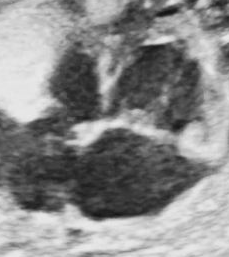

In [208]:
Image.fromarray(crop_image).s

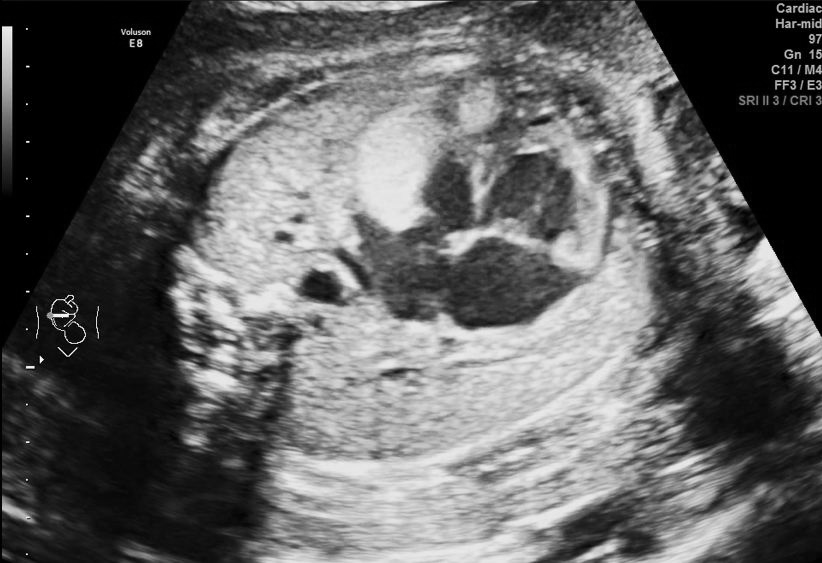

In [207]:
Image.fromarray(image)

In [52]:
coco_val

{'info': 'Fetal Heart Disease Detection',
 'license': ['none'],
 'images': [{'id': 2021000001,
   'file_name': 'normal_0001.png',
   'width': 970,
   'height': 666},
  {'id': 2021000002,
   'file_name': 'normal_0002.png',
   'width': 821,
   'height': 647},
  {'id': 2021000003,
   'file_name': 'normal_0003.png',
   'width': 1136,
   'height': 789},
  {'id': 2021000004,
   'file_name': 'normal_0004.png',
   'width': 472,
   'height': 352},
  {'id': 2021000005,
   'file_name': 'normal_0005.png',
   'width': 961,
   'height': 653},
  {'id': 2021000006,
   'file_name': 'normal_0007.png',
   'width': 507,
   'height': 421},
  {'id': 2021000007,
   'file_name': 'normal_0008.png',
   'width': 970,
   'height': 666},
  {'id': 2021000008,
   'file_name': 'normal_0009.png',
   'width': 906,
   'height': 722},
  {'id': 2021000009,
   'file_name': 'normal_0010.png',
   'width': 800,
   'height': 550},
  {'id': 2021000010,
   'file_name': 'normal_0011.png',
   'width': 964,
   'height': 660},
  {'i